#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime
from pandas import Series

#### Load the required files

In [3]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

#### Make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

In [4]:
train_original = train.copy() 
test_original = test.copy()

#### Change the data type to datetime format to extract date and time from the 'Datetime'.

In [5]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'],format = '%d-%m-%Y %H:%M')

In [6]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [7]:
train['day of week'] = train.Datetime.dt.dayofweek
temp = train['day of week']

#### Create a function to assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

In [8]:
def myfunction(x):
    if x.dayofweek == 5 or x.dayofweek == 6:
        return 1
    else:
        return 0

In [9]:
temp2 = train['Datetime'].apply(myfunction)
train['weekend'] = temp2
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


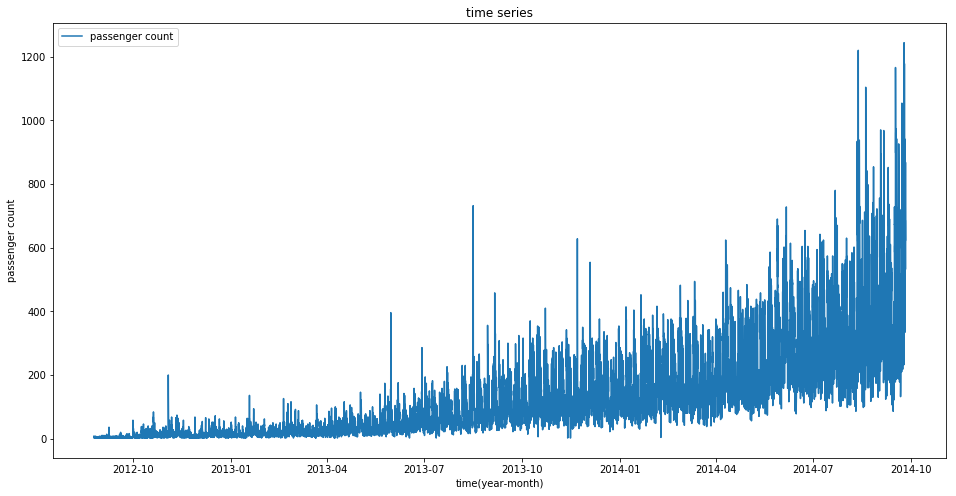

In [10]:
train.index = train['Datetime']  # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count'] 
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger count')
plt.title('time series')
plt.xlabel('time(year-month)')
plt.ylabel('passenger count')
plt.legend(loc = 'best')

#### We infer that there is an increasing trend in the series, i.e., the number of passengers are increasing with respect to time.

### Hypothesis Testing

1)There will be an increase in the traffic as the years pass by.

Explanation - Population has a general upward trend with time.

2)The traffic will be high from May to October.

Explanation - Tourist visits generally increases during this time period.

3)Traffic on weekdays will be more as compared to weekends/holidays.

Explanation - People will go to office on weekdays and hence the traffic will be more.

4)Traffic during the peak hours will be high.

Explanation - People will travel to work, college.

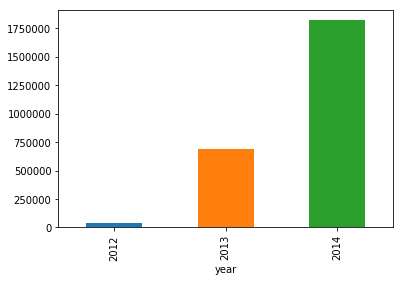

In [11]:
train.groupby('year')['Count'].sum().plot.bar()

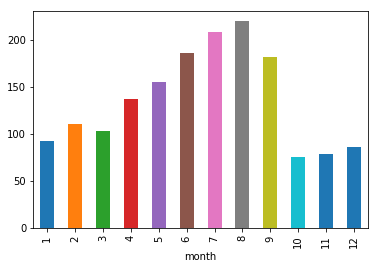

In [12]:
train.groupby('month')['Count'].mean().plot.bar()

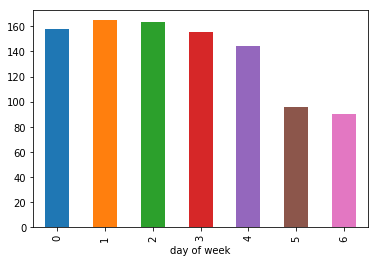

In [13]:
train.groupby('day of week')['Count'].mean().plot.bar()

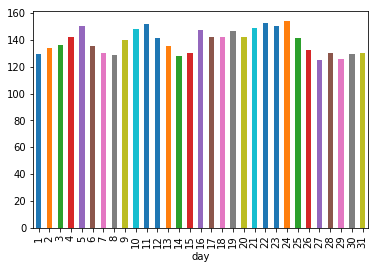

In [14]:
train.groupby('day')['Count'].mean().plot.bar()

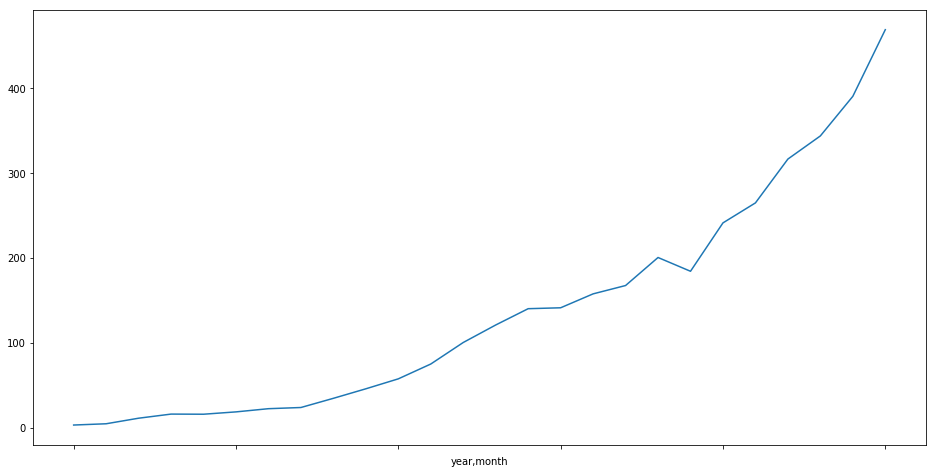

In [15]:
train.groupby(['year','month'])['Count'].mean().plot(figsize=(16,8))

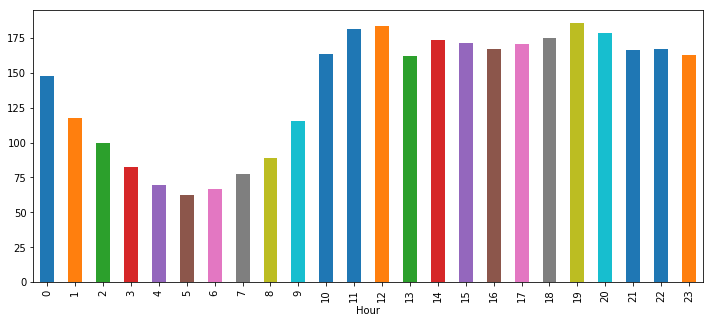

In [16]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(12,5))

In [17]:
train = train.drop('ID',axis = 1)
train.index = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.head()
import warnings 
warnings.filterwarnings('ignore')

As there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable.

In [18]:
hourly = train.resample('H').mean()
hourly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [19]:
daily = train.resample('D').mean()
daily.shape

(762, 7)

In [20]:
weekly = train.resample('W').mean()
weekly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


In [21]:
monthly = train.resample('M').mean()
monthly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581


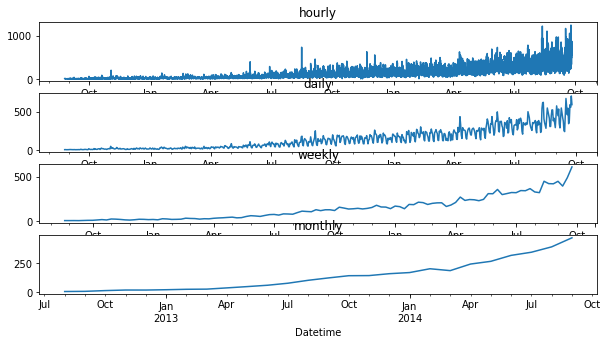

In [22]:
fig,axs = plt.subplots(4,1,figsize=(20,20))
hourly.Count.plot(figsize=(10,5),ax = axs[0],title = 'hourly')
daily['Count'].plot(figsize=(10,5),ax = axs[1],title = 'daily')
weekly['Count'].plot(figsize=(10,5),ax = axs[2],title = 'weekly')
monthly['Count'].plot(figsize=(10,5),ax = axs[3],title = 'monthly')


In [23]:
test.index = pd.to_datetime(test['Datetime'],format = '%d-%m-%Y %H:%M')
test = test.resample('D').mean()
test.head()

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


#### We will work on the daily time series as it is easy to convert daily prediction into hourly predictions.

In [24]:
train.index = pd.to_datetime(train['Datetime'] , format = '%d-%m-%Y %H:%M' )
train = train.resample('D').mean()
train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


#### Splitting the data into training and validation part

In [25]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

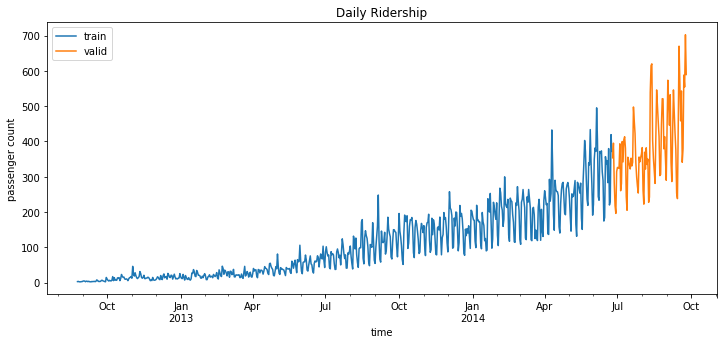

In [26]:
Train.Count.plot(figsize=(12,5), title = 'Daily Ridership' , label = 'train')
valid.Count.plot(figsize=(12,5), title = 'Daily Ridership' , label = 'valid')
plt.xlabel('time')
plt.ylabel('passenger count')
plt.legend(loc = 'best')
plt.show()

#### Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

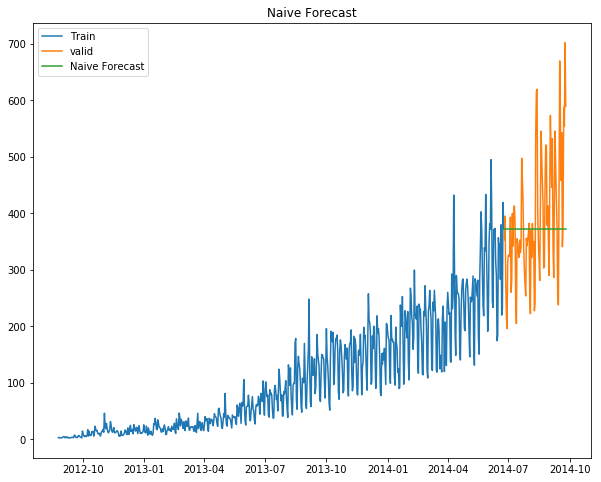

In [27]:
#naive approach
dd = np.asarray(Train.Count)

y_naive = valid.copy()
y_naive['Naive'] = dd[len(dd) - 1]

plt.figure(figsize = (10,8))
plt.plot(Train.index, Train.Count, label = 'Train')
plt.plot(valid.index, valid.Count, label = 'valid')
plt.plot(y_naive.index, y_naive['Naive'], label = 'Naive Forecast')
plt.legend(loc=0)
plt.title('Naive Forecast')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count,y_naive.Naive))
rms

111.79050467496724

#### Moving Average
In this technique we will take the average of the passenger counts for last few time periods only.

In [29]:
#moving average
y_mavg = valid.copy()
y_mavg['forecast'] = Train.Count.rolling(10).mean().iloc[-1]

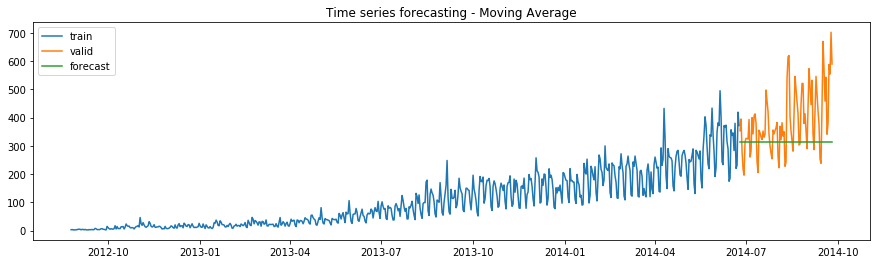

In [30]:
plt.figure(figsize=(15,4))
plt.plot(Train.index , Train.Count , label = 'train')
plt.plot(valid.index, valid.Count , label = 'valid')
plt.plot(y_mavg.index, y_mavg.forecast , label = 'forecast')
plt.title('Time series forecasting - Moving Average')
plt.legend(loc = 'best')
plt.show()

In [31]:
rms_MA = sqrt(mean_squared_error(valid.Count,y_mavg.forecast))
rms_MA

134.23733308950264

#### Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

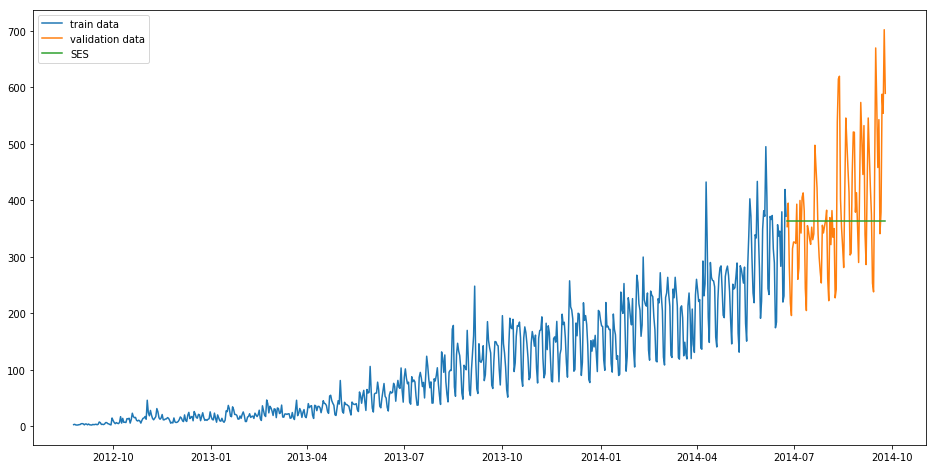

In [32]:
#exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
y_exp =  valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train.Count)).fit(optimized= False, smoothing_level= 0.6)
y_exp['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'train data')
plt.plot(valid['Count'], label = 'validation data')
plt.plot(y_exp['SES'], label = 'SES')
plt.legend(loc = 'best')
plt.show()

In [33]:
rms_exp = sqrt(mean_squared_error(valid.Count, y_exp.SES))
rms_exp

113.43708111884514

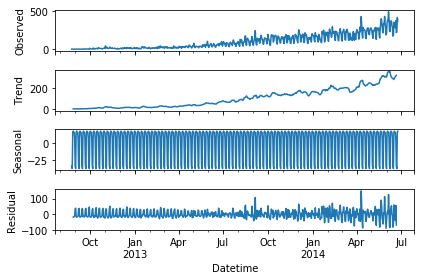

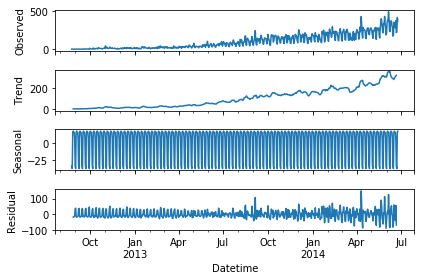

In [34]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()

In [35]:
result = sm.tsa.stattools.adfuller(train.Count)
result

(2.9863509590138677,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

#### Holt's Linear Trend Model
We fit the holt’s linear trend model on the train dataset and validate it using validation dataset.

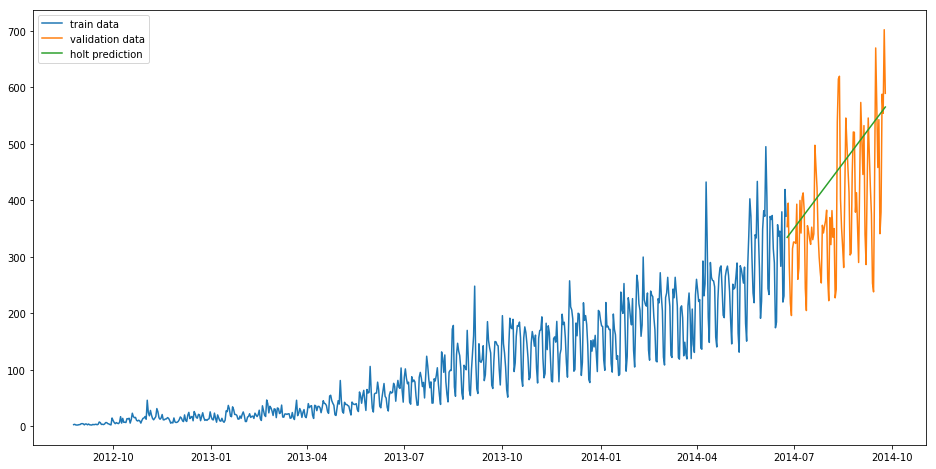

In [36]:
#Holt's Linear Trend Model
y_holt_linear = valid.copy()
fit1 = Holt(Train.Count).fit(smoothing_level=0.3, smoothing_slope= 0.1)
y_holt_linear['holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'train data')
plt.plot(valid['Count'], label = 'validation data')
plt.plot(y_holt_linear['holt_linear'], label = 'holt prediction')
plt.legend(loc = 'best')
plt.show()

In [37]:
rms_holt = sqrt(mean_squared_error(valid.Count,y_holt_linear.holt_linear))
rms_holt

112.94278345314041

In [38]:
#submission = pd.read_csv('submission.csv')

In [39]:
test['predict'] = fit1.forecast(len(test))


In [40]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [41]:
temp=train_original.groupby(['Hour'])['ratio'].sum() 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [42]:
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

In [43]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

In [44]:
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [45]:
prediction['Count']=prediction['predict']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [46]:
prediction.head()

,ID_x,day,predict,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,567.917497,18288,0,0.044287,603.627076,18288
1,18299.5,26.0,567.917497,18289,1,0.035343,481.725986,18289
2,18299.5,26.0,567.917497,18290,2,0.029911,407.688560,18290
3,18299.5,26.0,567.917497,18291,3,0.024714,336.858492,18291
4,18299.5,26.0,567.917497,18292,4,0.020802,283.534811,18292


In [47]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','predict','Hour', 'ratio'],axis=1) 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [48]:
df = pd.read_csv('Holt linear.csv')
df.head()

,Unnamed: 0,ID,Count
0,0,18288,603.627076
1,1,18289,481.725986
2,2,18290,407.688560
3,3,18291,336.858492
4,4,18292,283.534811


#### Holt's Winter Model
This method takes into account seasonality to forecast the future data points. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

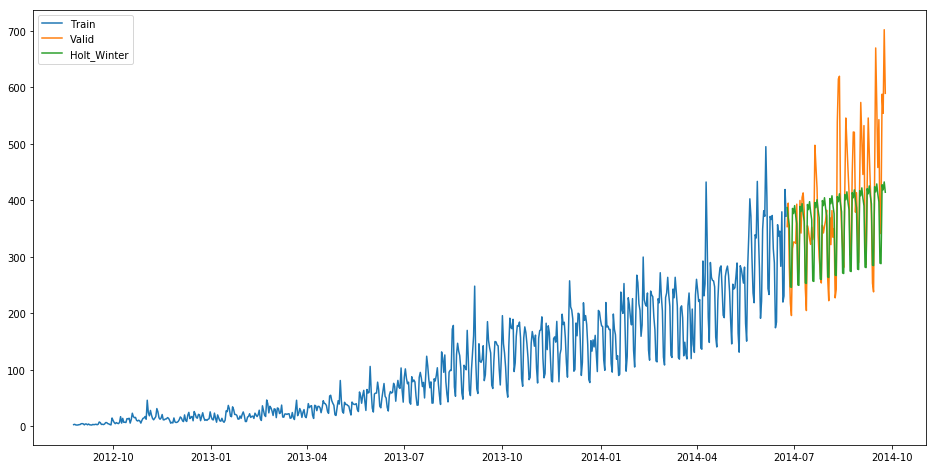

In [49]:
#Holt's Winter Model
y_holt_winter = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_holt_winter['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_holt_winter['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()


In [50]:
rms = sqrt(mean_squared_error(valid.Count, y_holt_winter.Holt_Winter)) 
print(rms)

82.37467736825413


In [51]:
predict=fit1.forecast(len(test))

In [52]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [53]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [54]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [55]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [56]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [57]:
df = pd.read_csv('Holt winters.csv')
df.head()

,Unnamed: 0,ID,Count
0,0,18288,411.716346
1,1,18289,328.571184
2,2,18290,278.072424
3,3,18291,229.761310
4,4,18292,193.390789
